## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
data.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table=data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"])
stat_table



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

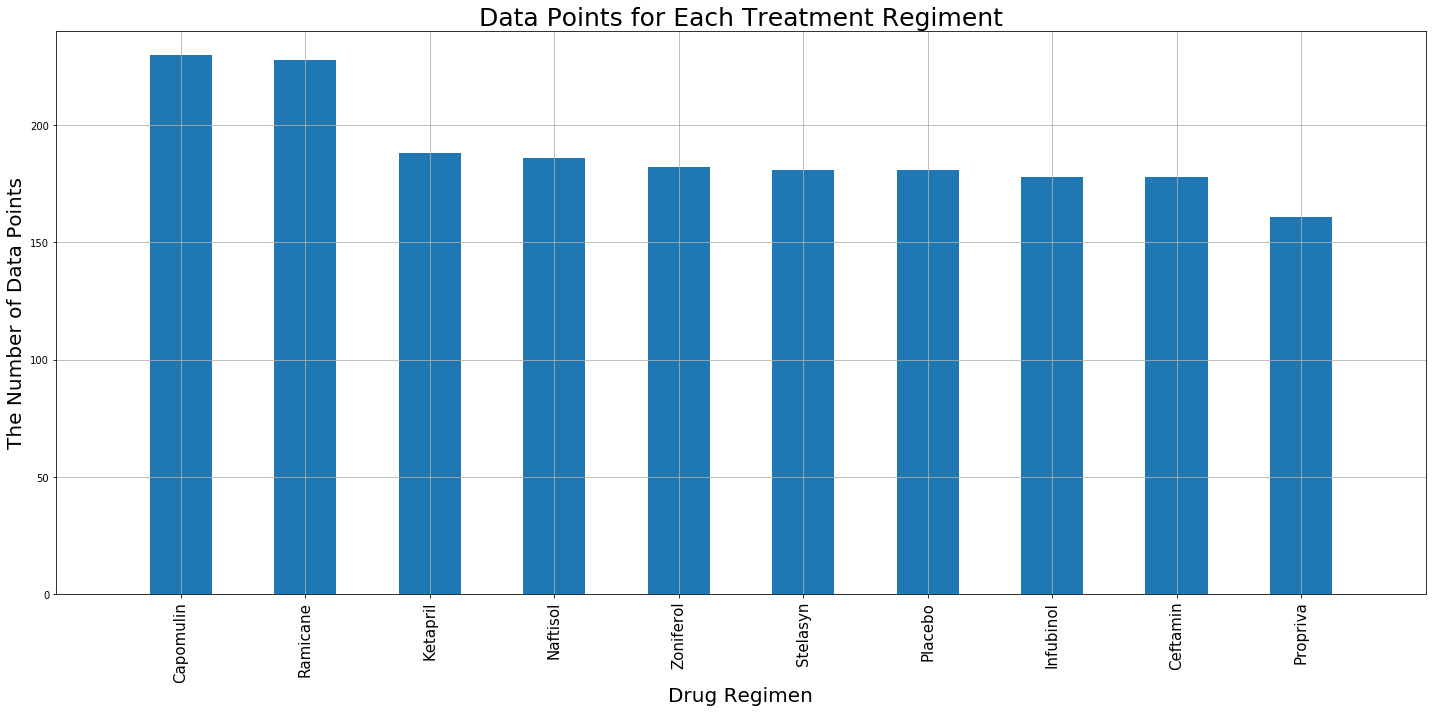

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=data.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pandas_bar=data_points.plot(kind="bar",figsize=(20,10))
plt.title("Data Points for Each Treatment Regiment",fontSize=25)
plt.xticks(fontSize=15)
plt.xlabel("Drug Regimen",fontSize=20)
plt.ylabel("The Number of Data Points",fontSize=20)
plt.xlim(-1,len(data_points))
plt.ylim(0,max(data_points)+10)
plt.grid()
plt.tight_layout()
plt.show()



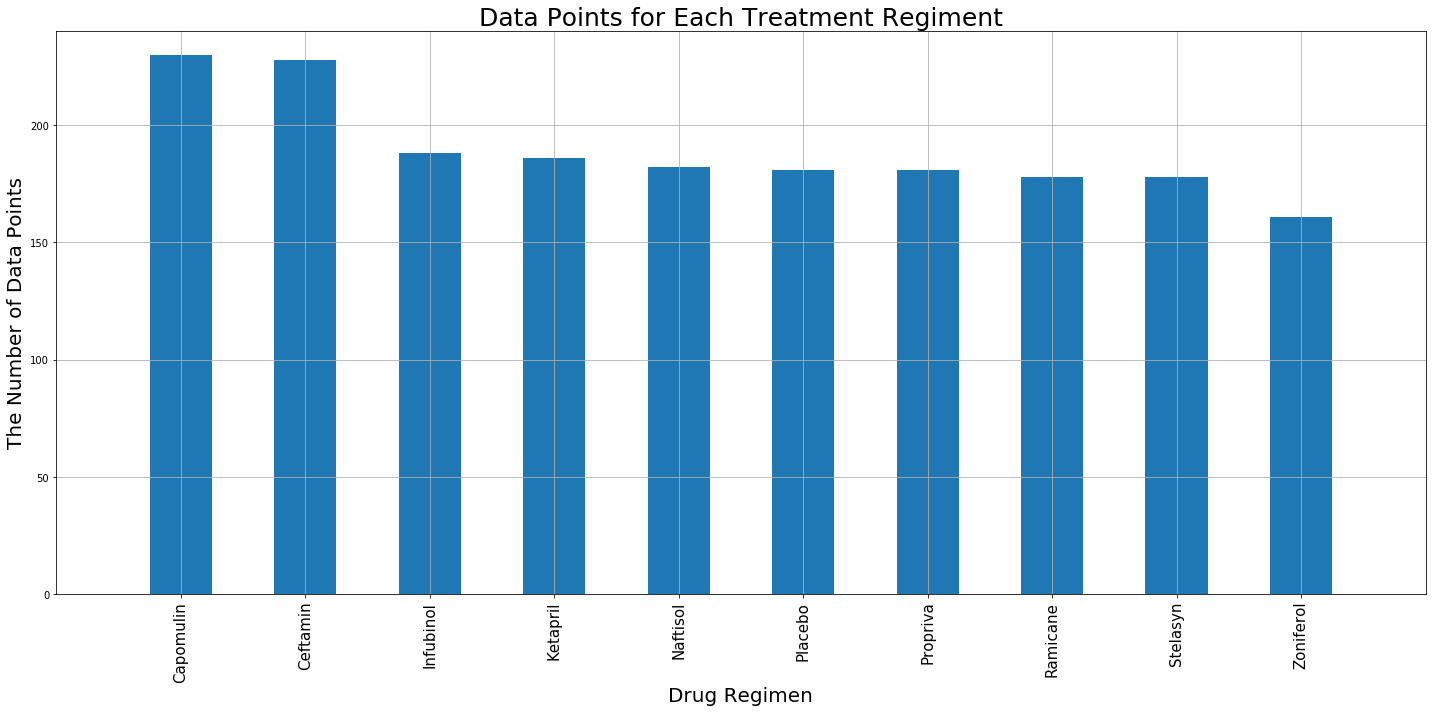

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=np.arange(len(data_points))
plt.figure(figsize=(20,10))
plt.bar(x_axis,data_points, width=0.5)
tick_location=[value for value in x_axis]
plt.xticks(tick_location,stat_table.index,rotation ="vertical")
plt.title("Data Points for Each Treatment Regiment",fontSize=25)
plt.xlim(-1,len(x_axis))
plt.ylim(0,max(data_points)+10)
plt.xticks(fontSize=15)
plt.xlabel("Drug Regimen",fontSize=20)
plt.ylabel("The Number of Data Points",fontSize=20)
plt.grid()
plt.tight_layout()
plt.show()


## Pie plots

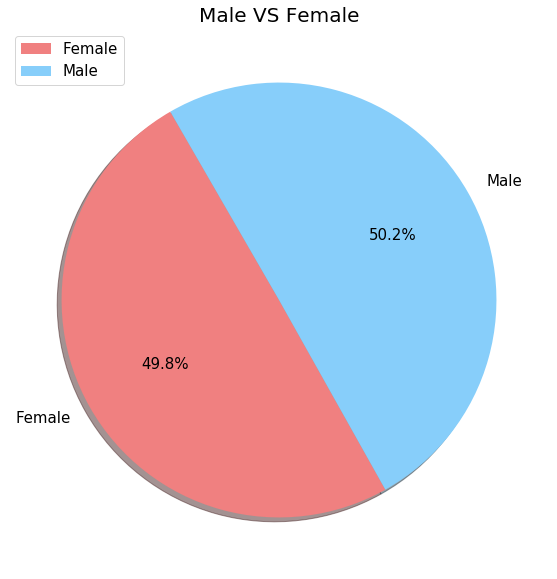

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex=mouse_metadata.groupby(["Sex"])["Mouse ID"].count()
pandas_pie=sex.plot(kind="pie",figsize=(20,10),autopct="%1.1f%%",shadow=True,startangle=120,fontsize=15,colors=["lightcoral", "lightskyblue"])
pandas_pie.set_ylabel('')
plt.title("Male VS Female", fontsize=20)
plt.legend(["Female","Male"],fontsize=15)
plt.show()

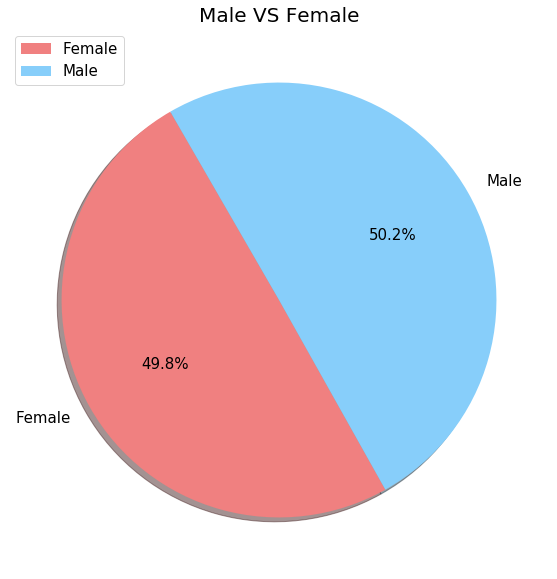

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(111)
ax.pie(sex,labels=sex.index,autopct="%1.1f%%",shadow=True,startangle=120,colors=["lightcoral", "lightskyblue"],textprops={'fontsize': 15})
ax.set_title("Male VS Female", fontsize=20)
ax.legend(["Female","Male"],fontsize=15)
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen